# Helmet Detection Training

This notebook handles the training of the YOLOv8 model for helmet detection.

In [1]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Ensure we are in the correct directory context
# Assuming this notebook is in 'src/' and data is in '../data/'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_yaml_path = os.path.join(project_root, 'data', 'data.yaml')
models_dir = os.path.join(project_root, 'models')

print(f"Project Root: {project_root}")
print(f"Data Config: {data_yaml_path}")

Project Root: d:\CV_Model
Data Config: d:\CV_Model\data\data.yaml


## 1. Check Image Sizes
It's good practice to check the image dimensions to choose an appropriate `imgsz` for training.
YOLOv8 works best with efficient strides (multiples of 32).

Sample Image Shape: (110, 190, 3)


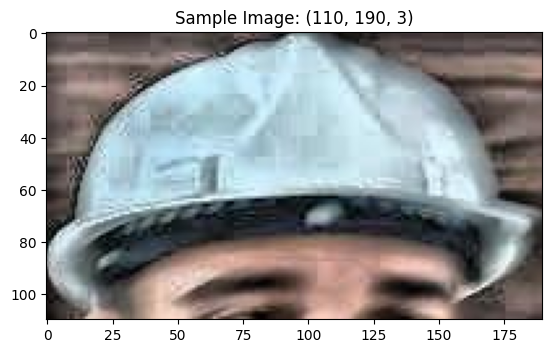

In [2]:
sample_image_path = os.path.join(project_root, 'data', 'train', 'images', '20221206_100020_jpg.rf.088425e3af7d981bfe4fe810f50b05a5.jpg')
if os.path.exists(sample_image_path):
    img = cv2.imread(sample_image_path)
    if img is not None:
        print(f"Sample Image Shape: {img.shape}")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Sample Image: {img.shape}")
        plt.show()
    else:
        print("Could not read image.")
else:
    print(f"Image not found at {sample_image_path}")

In [3]:
# Based on the check, images are around 110x190.
# 110 and 190 are NOT multiples of 32.
# Using imgsz=192 or imgsz=224 is recommended. 
# YOLO will resize the longest dimension to imgsz and pad the other dimension.
IMGSZ = 224 # A good standard small size

## 2. Train Model

In [8]:
# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')

print(model.names)


model.names

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [9]:
sum(p.numel() for p in model.model.parameters())

3157200

In [13]:
for p in model.model.parameters():
     print(p)

Parameter containing:
tensor([[[[-1.1523e-01, -1.0582e-02,  1.0693e-01],
          [-3.6816e-01,  3.3447e-02,  3.8745e-01],
          [-3.3716e-01, -1.3680e-02,  3.1201e-01]],

         [[-1.4233e-01,  9.7656e-03,  1.5222e-01],
          [-4.8999e-01,  2.7908e-02,  4.6021e-01],
          [-3.7256e-01, -2.7542e-03,  3.4814e-01]],

         [[-4.9866e-02, -1.4900e-02,  2.4887e-02],
          [-2.1375e-01,  3.2898e-02,  1.9385e-01],
          [-1.5344e-01,  3.1113e-02,  1.5649e-01]]],


        [[[ 1.2283e-02,  1.8890e-02,  8.2321e-03],
          [-2.7218e-03, -2.3987e-02,  2.9926e-03],
          [-1.7059e-02, -1.4148e-01, -1.7426e-02]],

         [[-9.5062e-03,  1.2146e-02,  8.6975e-04],
          [-7.3242e-03, -2.6993e-02, -5.9357e-03],
          [-2.0844e-02, -1.4062e-01, -2.2461e-02]],

         [[-1.9436e-03,  4.3182e-03, -3.6392e-03],
          [ 3.4027e-03, -8.4229e-03,  6.2981e-03],
          [ 1.0201e-02, -6.1340e-02,  1.8524e-02]]],


        [[[-1.0460e-02, -8.2520e-02, -3.0899

In [4]:
# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=IMGSZ,
    batch=16,
    project=models_dir,
    name='helmet_yolov8n',
    exist_ok=True
)

New https://pypi.org/project/ultralytics/8.3.245 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.234  Python-3.8.20 torch-2.4.1+cpu CPU (Intel Core i7-5500U 2.40GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=d:\CV_Model\data\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_yolov8n, nbs=64, nms=False, opse

KeyboardInterrupt: 

In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


False
0
No GPU


## 3. Validation & Export

In [ ]:
metrics = model.val()
print("mAP50:", metrics.box.map50)

# Export
model.export(format='onnx')